In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk   
from nltk.corpus import stopwords   
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer   
from sklearn.svm import SVC  
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\COVIDSenti-A.csv")

In [3]:
df

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [4]:
df.info

<bound method DataFrame.info of                                                    tweet label
0      Coronavirus | Human Coronavirus Types | CDC ht...   neu
1      @shehryar_taseer That‚Äôs üíØ true , \nCorona...   neu
2      TLDR: Not SARS, possibly new coronavirus. Diff...   neg
3      Disease outbreak news from the WHO: Middle Eas...   neu
4      China - Media: WSJ says sources tell them myst...   neu
...                                                  ...   ...
29995  CDC: Re-test confirms Westerdam cruise ship pa...   neu
29996  Two doctors die of coronavirus within 24 hours...   neu
29997  BEIJING - The lockdown of Guo Jing's neighbour...   neu
29998  #CoronavirusOutbreak in #Balochistan !!\n#CPEC...   neu
29999  The Australian dollar has hit a fresh decade l...   neu

[30000 rows x 2 columns]>

In [5]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

In [6]:
df["label"].value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

In [8]:
df.isna()

,tweet,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
29995,False,False
29996,False,False
29997,False,False
29998,False,False


<AxesSubplot:xlabel='label', ylabel='count'>

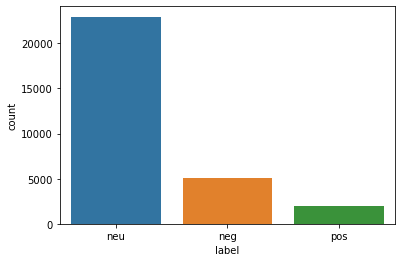

In [7]:
sns.countplot(x="label",data=df)

In [8]:
stop_words = set(stopwords.words('english'))

In [9]:
def clean(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower() # Making all the words in lower case
    temp = re.sub("'","",temp) #To avoid removing contractions in English
    temp = re.sub("@[A-Za-z0-9_]+","", temp) #Removing mentions     
    temp = re.sub("#[A-Za-z0-9_]+","", temp) #Removing hashtags
    temp = re.sub(r'http\S+', '', temp) #Removing links
    temp = re.sub('\[().*!?\]', ' ', temp) # Removing punctuations
    temp = re.sub("[^a-z0-9]", " ", temp)
    temp = temp.split() # Splitting the sentence into individual words
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp

In [10]:
df['tweet'] = df['tweet'].apply(clean)

In [11]:
df

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,true corona virus swine flue bird flu december...,neu
2,tldr sars possibly new coronavirus difficult c...,neg
3,disease outbreak news middle east respiratory ...,neu
4,china media wsj says sources tell mystery pneu...,neu
...,...,...
29995,cdc test confirms westerdam cruise ship passen...,neu
29996,two doctors die coronavirus within 24 hours ch...,neu
29997,beijing lockdown guo jings neighbourhood wuhan...,neu
29998,route spread,neu


In [12]:
df.duplicated().sum()

2096

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.info

<bound method DataFrame.info of                                                    tweet label
0                coronavirus human coronavirus types cdc   neu
1      true corona virus swine flue bird flu december...   neu
2      tldr sars possibly new coronavirus difficult c...   neg
3      disease outbreak news middle east respiratory ...   neu
4      china media wsj says sources tell mystery pneu...   neu
...                                                  ...   ...
29995  cdc test confirms westerdam cruise ship passen...   neu
29996  two doctors die coronavirus within 24 hours ch...   neu
29997  beijing lockdown guo jings neighbourhood wuhan...   neu
29998                                       route spread   neu
29999  australian dollar hit fresh decade low investo...   neu

[27904 rows x 2 columns]>

<AxesSubplot:xlabel='label', ylabel='count'>

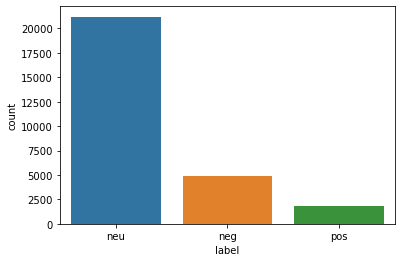

In [15]:
sns.countplot(x="label",data=df)

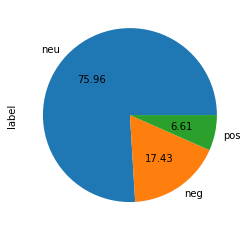

In [17]:
df['label'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [18]:
x=df["tweet"]
y=df["label"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [21]:
clf = SVC(kernel='linear') 
clf.fit(train_vectors, y_train)

SVC(kernel='linear')

In [22]:
pred =clf.predict(test_vectors)

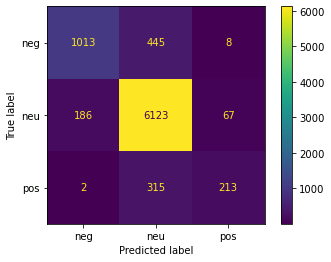

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         neg       0.84      0.69      0.76      1466
         neu       0.89      0.96      0.92      6376
         pos       0.74      0.40      0.52       530

    accuracy                           0.88      8372
   macro avg       0.82      0.68      0.73      8372
weighted avg       0.87      0.88      0.87      8372

